In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types
from main.data_tools.query_dataframes import cut_dfs_4types


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream10_5_presel/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream11_4_presel/'


In [3]:
Vgamma_ccbar = base_file_loc + 'charm/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

Vgamma_uds = base_file_loc + 'uds/*.root'
Vgamma_charged = base_file_loc + 'charged/*.root'
Vgamma_mixed = base_file_loc + 'mixed/*.root'


In [4]:
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.00078 && Dstarp_CMS_p>2.5'
base_filter+=' && gamma_E>0.47'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter=' D0_M>1.8 && D0_M<1.9 && Dstarp_isSignal!=1'
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Phi_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob2']
tree='phi'

In [5]:
# pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)

pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_uds = get_pd(file=Vgamma_uds, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_charged = get_pd(file=Vgamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_mixed = get_pd(file=Vgamma_mixed, tree=tree,base_filter=base_filter,variables=variables)


input_line_83:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_94:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_109:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + '&& Dstarp_isSignal==1',variables=variables)
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal==1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter ,variables=variables)

In [7]:
pd_ccbar = pd_Vgamma_ccbar.reset_index(drop=True)
pd_uds = pd_Vgamma_uds.reset_index(drop=True)
pd_charged = pd_Vgamma_charged.reset_index(drop=True)
pd_mixed = pd_Vgamma_mixed.reset_index(drop=True)


In [8]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uds['rank'] = pd_uds.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')


In [9]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uds[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates())
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uds[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 

print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

4399
4372
1.0061756633119854


In [10]:
# plt.hist(pd_ccbar.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.xlim(1.68,2.05)

In [11]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uds,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uds,pd_charged, pd_mixed)

[ 61.43459916  65.01828411  66.55414909  69.11392405  67.57805907
  52.73136428  61.43459916  60.92264416  60.92264416  53.24331927
  65.01828411  66.04219409  84.98452883  74.23347398  79.8649789
  79.35302391  86.52039381 103.92686357  92.15189873 113.65400844
 110.07032349 103.92686357  83.96061885  70.13783404  61.43459916
  36.3488045   17.91842475  17.91842475  13.82278481  19.45428973
  18.94233474  11.77496484  11.77496484  11.77496484  16.38255977
  14.8466948   11.26300985  17.91842475  10.23909986   8.70323488
  10.75105485   9.72714487  12.28691983  12.79887482  13.31082982
  10.23909986  11.26300985  12.79887482  13.82278481  11.77496484]
fitst_bin_entries=61.43459915611824


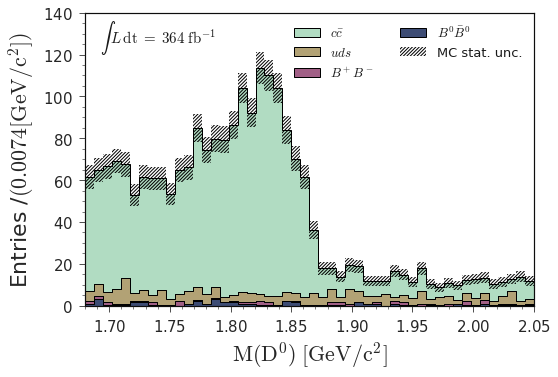

In [17]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


# scale = 1
scale = 364/711

xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]", luminosity="$364\; \mathrm{fb}^{-1}$")
plt.tight_layout()
# plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/Belle_phi_4S_optimzied_nopi0veto_D0_stream11_4.png")
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/scaled_down_to_364_Belle_phi_4S_optimzied_nopi0veto_D0_stream11_4.png")

# plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_phi_4S_optimzied_nopi0veto_D0_stream11_4.png")

[102.90295359  81.91279887  89.59212377  86.52039381  80.88888889
  81.40084388  58.3628692   55.29113924  44.54008439  43.5161744
  47.09985935  55.29113924  36.86075949  36.3488045   25.08579466
  23.54992968  27.13361463  25.59774965  23.03797468  24.06188467
  14.3347398   12.79887482  18.43037975  16.38255977  13.31082982
  10.75105485  15.87060478  15.35864979  17.91842475  13.31082982
  19.96624473  24.06188467  24.57383966  27.64556962  27.13361463
  31.22925457  32.25316456  30.20534459  40.44444444  50.17158931
  52.21940928  50.6835443   49.65963432  66.04219409  74.23347398
  80.3769339   89.08016878  93.68776371  97.78340366  93.17580872]
fitst_bin_entries=102.90295358649755


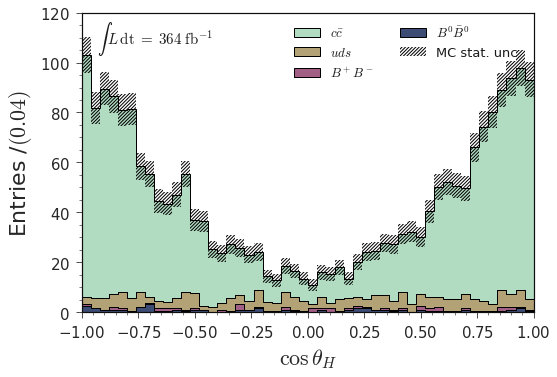

In [18]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


# scale = 1
scale = 364/711

xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
luminosity="$364\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity)
plt.tight_layout()
# plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/Belle_phi_4S_optimzied_nopi0veto_cosHel_stream11_4.png")
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/scaled_down_to_364_Belle_phi_4S_optimzied_nopi0veto_cosHel_stream11_4.png")


# plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_phi_4S_optimzied_nopi0veto_cosHel_stream11_4.png")

[5892. 1264.  170.   82.   22.]
fitst_bin_entries=5892.0


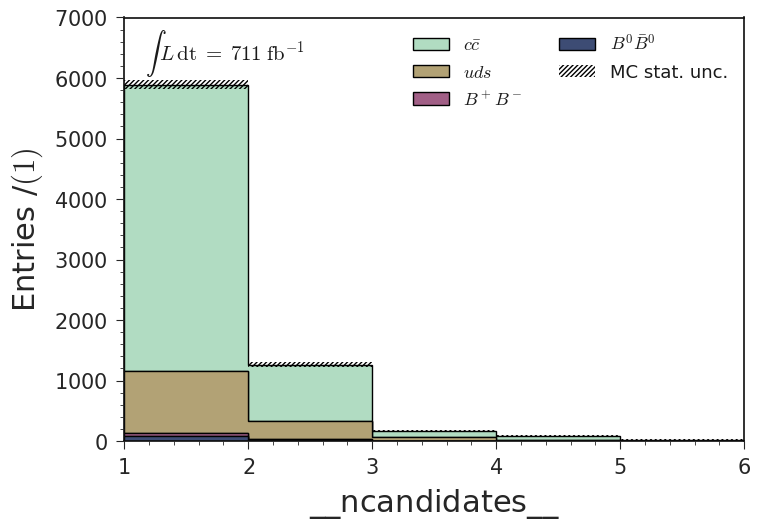

In [65]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity=luminosity)
# plt.savefig("MC15rd_phi_1ab_optimized_ncandidates.png")